In [15]:
import pandas as pd
import numpy as np
from sklearn import preprocessing;
from sklearn.model_selection import train_test_split;
from sklearn import linear_model;
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler

In [3]:

prices_df = pd.read_csv('price_temp_total.csv')

price = pd.DataFrame(prices_df.RRP)
# price.plot()
# price

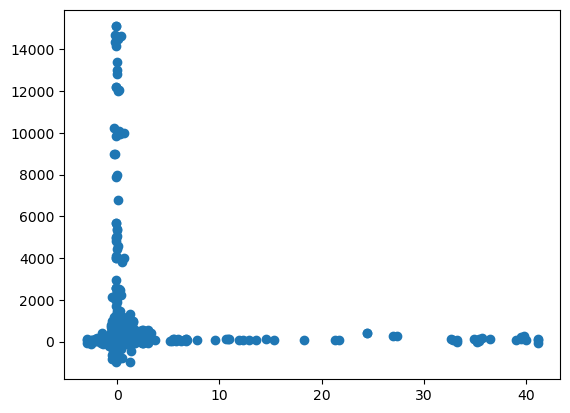

In [18]:
forecast_out = 100
test_size = 0.2; 
df = price
label = df.shift(-forecast_out);
X = np.array(df); 
# X = preprocessing.scale(X) 

scaler = StandardScaler()
scaler = scaler.fit(X)
X = scaler.transform(X)
# label = preprocessing.scale(label) 
#plt.plot(X)


X_lately = X[-forecast_out:] 
X = X[:-forecast_out] 
label.dropna(inplace=True)
y = np.array(label) 

X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=test_size) 
plt.scatter(X_train, Y_train)
plt.show()

learner = linear_model.LinearRegression() 

learner.fit(X_train,Y_train); 
score=learner.score(X_test,Y_test)

forecast = learner.predict(X_lately) 

response = {}
response['test_score'] = score
response['forecast_set'] = forecast

# print(response);

In [29]:
X_first = scaler.inverse_transform(X_lately)
# X_La

In [30]:
Error = X_first - forecast
Err_2 = np.power(Error, 2)
print(f'R-square {sum(Err_2)}')

R-square [1732901.90253142]


In [31]:
MBE = np.mean(Error)
print(f'MBE is  {MBE}')
NMBE = np.mean(X_first)/MBE
print(f'NMBE is  {NMBE}')
Err_2 = np.power(Error, 2)
print(f'R-square {sum(Err_2)}')
NRMSE = np.mean(np.sqrt(Err_2))
print(f'NRMSE is  {NRMSE}')

MBE is  52.0716941225654
NMBE is  2.763188377572827
R-square [1732901.90253142]
NRMSE is  106.21136778120609
